In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import time

<img src="MLP.png" style="width:700px; height:900">

In [4]:
N = 5 # number of neurons in the hidden layer
n = 2 # number of features

# The y_hat function

<img src="y_hat.png" style="width:700px; height:900">

In [5]:
# define the prediction function
def y_hat(w, b, v, x):
    y_h = np.zeros(len(x))
    wb = np.hstack((w,np.reshape(b, (-1, 1))))
    for i in range(len(x)):
        row = x[i]
        dot_product = np.tanh(np.dot(wb, np.reshape(row, (-1, 1))))  # Perform W.X
        result = np.dot(np.reshape(dot_product, (1, -1)), np.reshape(v, (-1, 1)))  # Perform (W.X).V
        y_h[i] = result
    return y_h

In [6]:
# define the loss function by defining the MSE then the regularized error
def mse(y_h, y):
    return sum((y_h-y)**2)/len(y)

In [7]:
# reading the data
df = pd.read_csv('X1,X2,Y.csv')

In [8]:
df['ones'] = np.ones(250)

In [9]:
x = df.drop(columns= "Y")
x = x.to_numpy()
y = df["Y"].to_numpy()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 2057785) 

In [11]:
train_data = np.hstack((x_train, np.reshape(y_train, (-1, 1))))

In [12]:
np.random.seed(2108602)
W0 = np.random.random(N*(N+n-1))
rho = 1e-05

# The error function

<img src="E.png" style="width:700px; height:900">

In [13]:
# the error function
def err_fn(W, train_data):
    X_train = train_data[:, 0:3]
    Y_train = train_data[:, 3]
    w = np.reshape(W[0:n*N],(N,n))
    v = np.reshape(W[n*N:n*N+N],(N,1))
    b = np.reshape(W[n*N+N:n*N+2*N],(N,1))
    y_h = y_hat(w, b, v, X_train) # predicted y (yhat)
    e_mse = mse(y_h, Y_train) # mean squared error
    regularization_term = 0.5 * rho * (np.linalg.norm(w) ** 2 + np.linalg.norm(v) ** 2 + np.linalg.norm(b) ** 2)
    return e_mse + regularization_term  # error function

In [14]:
# MLP Optimization
Optimization_method = "L-BFGS-B"
start = time.time()
res = minimize(err_fn, W0, args=(train_data), method=Optimization_method, tol=1e-7)


In [15]:
print(res)

      fun: 0.050087653938422946
 hess_inv: <30x30 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.50023569e-03,  1.66639271e-03,  1.50450714e-02, -2.19653045e-02,
        8.48331128e-04,  5.19602350e-03, -3.38259700e-03,  5.58211394e-03,
       -1.31719053e-02,  3.77443355e-03, -1.49407280e-03, -2.19698477e-03,
        1.88429273e-03, -1.56447632e-03, -1.77807978e-03,  1.42399425e-02,
        1.57746872e-03, -7.13387679e-06,  4.17732448e-03,  1.03915091e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15004
      nit: 435
     njev: 484
   status: 1
  success: False
        x: array([ -0.16715244,   0.53748491,   0.12025721,   0.58966742,
         0.21135622,   1.24345389,   2.29230669,  -0.29777872,
         1.00511595,   0.20183287, -12.57016478,  11

In [16]:
cost_time = time.time() - start

In [17]:
cost_time

21.53759455680847

In [18]:
# Test results
final_W = res.x
w = np.reshape(final_W[0:n*N],(N,n))
v = np.reshape(final_W[n*N:n*N+N],(N,1))
b = np.reshape(final_W[n*N+N:n*N+2*N],(N,1))

In [19]:
y_pred_train = y_hat(w, b, v, x_train)

In [20]:
mse_train = mse(y_pred_train, y_train)
mse_train 

0.048483899438246

In [21]:
y_pred = y_hat(w, b, v, x_test)

In [22]:
mse_test = mse(y_pred, y_test)
mse_test

0.183545686879591

In [23]:
len(df)

250

In [24]:
df.head()

,X1,X2,Y,ones
0,-0.016816,1.493616,-0.996794,1.0
1,-0.095445,2.742787,-1.169155,1.0
2,-1.900142,0.674756,0.256157,1.0
3,-0.982229,1.464483,0.880567,1.0
4,0.919084,1.495322,-0.863523,1.0


C:\Users\ENG MOHAMED\AppData\Local\Temp\ipykernel_14240\3974511550.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


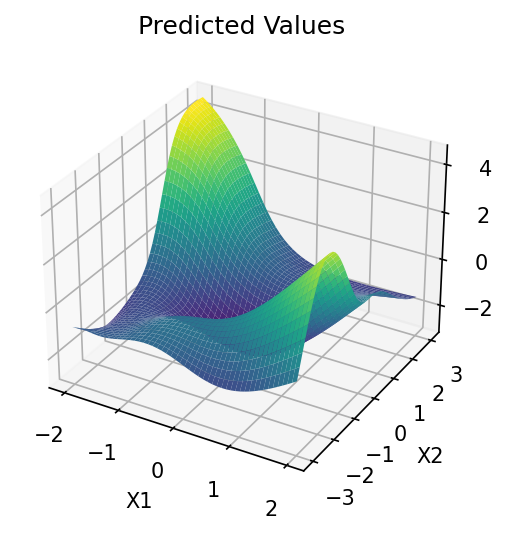

In [28]:
from matplotlib import projections
from mpl_toolkits.mplot3d import Axes3D
x1_vals = np.linspace(-2, 2, 50)
x2_vals = np.linspace(-3, 3, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
x_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten(), np.ones(len(x1_mesh.flatten()))))      
y = y_hat(w, b, v, x_mesh)
y_mesh = y.reshape(x1_mesh.shape)
fig = plt.figure(dpi = 150)
ax = plt.gca(projection = '3d')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted Values')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, cmap='viridis')


# The real values

<img src="plot.png" style="width:700px; height:900">